# Análise de Sentimentos - Reviews dos Parques da Disney

Autora: Maria Helena Siqueira dos Santos

Esse projeto tem como foco fazer análise de sentimentos com base em reviews coletadas dos diferentes parques de Disney. A intenção é aplicar conceitos estudados acerca do assunto de Processamento de Linguagem Natural (NLP).


# Coleta de dados
Os dados coletados foram de um repositório disponibilizado no kaggle, que possui arquivo ".csv" contendo informações sobre os diferentes parques da Disney. 

Fonte: https://www.kaggle.com/datasets/arushchillar/disneyland-reviews.

<img src="img/IMG.jpg" style="width:700px; heigth:7000px"/>

In [5]:
# importando bibliotecas necessárias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


In [6]:
# instalando o World Cloud 
! pip install WordCloud

In [7]:
from wordcloud import WordCloud

In [8]:
stopwords = nltk.corpus.stopwords.words("english") #idioma

# ANÁLISE EXPLORATÓRIA

In [9]:
df = pd.read_csv('DisneylandReviews.csv',encoding='latin-1')
df.head(5)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


Explicando as variáveis:
- Review_ID: ID do usuário.
- Rating: Avaliação do parque.
- Year_Month: Ano em que foi publicada a review.
- Reviewer_Location: Localização em que foi feita a review.
- Review_Text: O comentário acerca do parque (review).
- Branch: Qual o parque da disney que se refere a review.

Vendo informações dos dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


Vendo as colunas do dataset

In [11]:
df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch'],
      dtype='object')

Vendo o tamanho do dataset

In [12]:
df.shape

(42656, 6)

Vendo se existe dados nulos 

In [13]:
df.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

Vendo os tipos dos dados

In [14]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

Vendo a classificação dos parques 

In [15]:
r = df['Rating'].value_counts()
print(r)

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64


Visualizando em um gráfico

<AxesSubplot:title={'center':'Ratings'}>

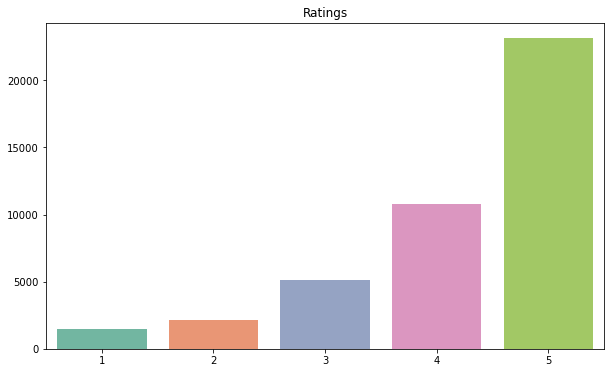

In [16]:
x = r.keys().to_list()
y = r.values.tolist()
plt.figure(figsize=(10,6))
plt.title("Ratings")
sns.barplot(x=x, y=y, palette="Set2")

Vemos que a maioria das Reviews possuem teor positivo.

In [17]:
df['Year_Month'].value_counts()

missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: Year_Month, Length: 112, dtype: int64

Vendo a concentração das avaliações(reviews) nos diferentes parques 

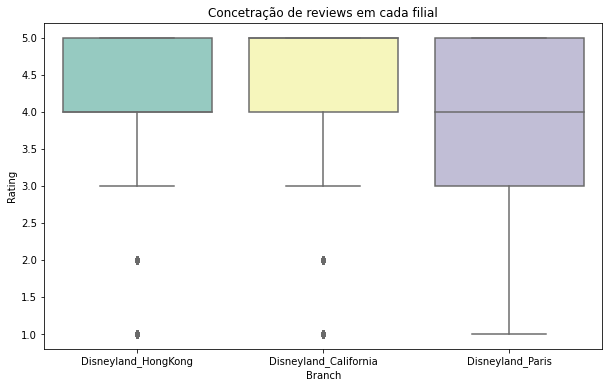

In [18]:
plt.figure(figsize=(10, 6))
plt.title("Concetração de reviews em cada filial")
sns.boxplot(x=df['Branch'], y=df['Rating'], data=df, palette="Set3")
plt.show()

Visualizando uma review 

In [19]:
df.Review_Text[0]

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

### Fazendo a limpeza e tratamento dos dados 

In [20]:
# removendo coluna que não interfere na análise
df.drop('Review_ID', axis=1, inplace=True)

In [21]:
# Verificando a remoçao da coluna Review_ID
df.head()

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [22]:
def rating(number):
    if number > 3:
        return 'positive review'
    elif number < 3:
        return 'negative review'
    else:
        return 'neutral review'

In [23]:
# testando a funcao
rating(3)

'neutral review'

In [24]:
df['value'] = df['Rating'].apply(rating)

In [25]:
# Conferindo a criação da nova coluna
df.head()

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,value
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,positive review
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,positive review
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,positive review
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,positive review
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,positive review


Esta função remove tudo aquilo que não faz parte alfabeto

In [26]:
# Passei todas as palavras para letra minuscula para conterem o mesmo peso 
def remove(string):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+') 
    tokens = tokenizer.tokenize(string)
    new = [token.lower() for token in tokens if token.lower() not in stopwords]
    nova = " ".join(new)
    return nova

In [27]:
# funçao teste
remove("The IBM user is: @IBM")

'ibm user ibm'

In [28]:
# aplicando a função na coluna de review
df['Review_Text'] = df['Review_Text'].apply(remove)

In [29]:
# Verificando se as remoções foram feitas!
df.head()

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,value
0,4,2019-4,Australia,ever disneyland anywhere find disneyland hong ...,Disneyland_HongKong,positive review
1,4,2019-5,Philippines,since last time visit hk disneyland yet time s...,Disneyland_HongKong,positive review
2,4,2019-4,United Arab Emirates,thanks god hot humid visiting park otherwise w...,Disneyland_HongKong,positive review
3,4,2019-4,Australia,hk disneyland great compact park unfortunately...,Disneyland_HongKong,positive review
4,4,2019-4,United Kingdom,location city took around hour kowlon kids lik...,Disneyland_HongKong,positive review


## Construção da WordCloud

WordCloud ou "nuvem de palavras" é utilizada para verificar palavras mais frequentes em um texto. O tamanho da palavra é proporpiconal ao número de vezes em que aparece em um texto.
Neste caso, irei filtrar as palavras mais comuns de cada tipo de review e a partir disso, irei criar uma wordcloud com palavras mais frequentes em textos positivas e outra com palavras mais frequentes em reviews negativas.

In [30]:
from nltk.corpus import stopwords

In [31]:
stopwords = set(stopwords.words('english'))

In [32]:
positive_reviews = df[df['value']== 'positive review']['Review_Text']

In [33]:
negative_reviews =  df[df['value']== 'negative review']['Review_Text']

In [34]:
p_count = positive_reviews.value_counts().sum()

In [35]:
n_count = negative_reviews.value_counts().sum()

In [36]:
print(f"Existem {p_count} reviews de teor positivo e {n_count} de teor negativo")

Existem 33921 reviews de teor positivo e 3626 de teor negativo


In [37]:
p = positive_reviews.tolist()
n = negative_reviews.tolist()

Criação de uma função que conta a frequencia de palavras

In [38]:
# Passei todas as palavras para letra minuscula para conterem o mesmo peso 
def frequencia(string):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+') 
    tokens = tokenizer.tokenize(string)
    freq = nltk.FreqDist(tokens)
    freq.most_common()
    return freq

In [39]:
# testando a funçao
frequencia("mary is happy, mary is cool")

FreqDist({'mary': 2, 'is': 2, 'happy': 1, 'cool': 1})

In [40]:
join_p = " ".join(map(str,p)) # juntando as positivas 

In [41]:
join_n = " ".join(map(str, n)) # juntando as negativas

In [42]:
freq_word_pos = frequencia(join_p)
freq_positive = " ".join(map(str,freq_word_pos))

In [43]:
freq_word_neg = frequencia(join_n)
freq_negative = " ".join(map(str,freq_word_neg))

### Visualizando as palavras mais comuns em Reviews positivas 

In [44]:
img = np.array(Image.open("img/mickey.jpg"))

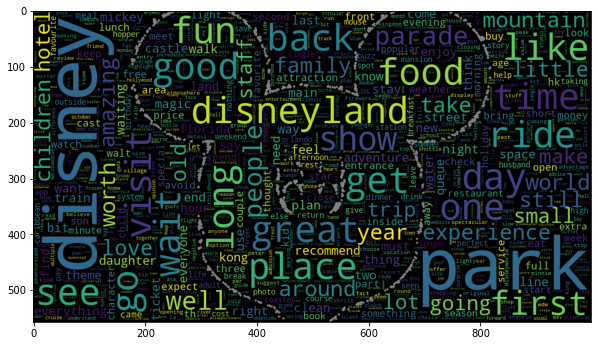

In [45]:
mickey_cloud = WordCloud(stopwords=stopwords, background_color='black', max_words=1000, mask=img, 
                        contour_width=5, contour_color='gray').generate(freq_positive)
plt.figure(figsize=(10,6))
plt.imshow(mickey_cloud)


Vemos nessa WorldCloud que existe grandes destaques de palavras positivas tais como:
* Amazing
* Good 
* Love
* Like
* Perfect

### Visualizando as palavras mais comuns em Reviews negativas

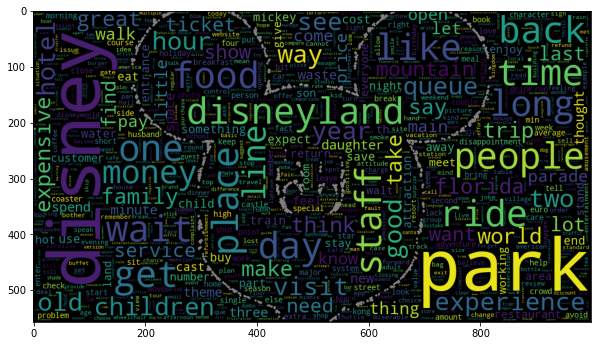

In [46]:
mickey_cloud = WordCloud(stopwords=stopwords, background_color='black', max_words=1000, mask=img, 
                        contour_width=5, contour_color='gray').generate(freq_negative)
plt.figure(figsize=(10,6))
plt.imshow(mickey_cloud)

Vemos nessa WorldCloud que existe grandes destaques de palavras negativas tais como:
* Expensive
* Disappointment
* Waste


## Construção do Modelo - VADER
Utilizarei para análise de sentimento o VADER

### O que é o VADER? 

O VADER pertence a biblioteca NLTK e por meio dele podemos fazer análises de sentimento de forma simples e prática. A composição é feita pelos valores negativos, positivos e neutros. Por meio dele, é possível fazer as métricas para classificar uma review. Como a intenção do modelo é justamente saber se uma avaliação é positiva, negativa ou neutra, irei deixar apenas informações que se referem ao label (no caso, se é positivo, negativo ou neutro) e as palavras que foram limpas, reviews.

In [47]:
df_modelo = df[['Review_Text','value']]
df_modelo.head()

,Review_Text,value
0,ever disneyland anywhere find disneyland hong ...,positive review
1,since last time visit hk disneyland yet time s...,positive review
2,thanks god hot humid visiting park otherwise w...,positive review
3,hk disneyland great compact park unfortunately...,positive review
4,location city took around hour kowlon kids lik...,positive review


In [48]:
sentimentanalysis = SentimentIntensityAnalyzer() 

In [49]:
def score(string): # funçao que retorna os scores 
    values = sentimentanalysis.polarity_scores(string) 
    return values

In [50]:
# Testando a funçao
score("I hated Disneyland!!")

{'neg': 0.827, 'neu': 0.173, 'pos': 0.0, 'compound': -0.6988}

In [51]:
# criando a coluna score
df_modelo['scores'] = df_modelo['Review_Text'].apply(score)
df_modelo.head()

/var/folders/7d/psz38spx4pq53_ktfx55xyh40000gn/T/ipykernel_2252/325576019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['scores'] = df_modelo['Review_Text'].apply(score)


,Review_Text,value,scores
0,ever disneyland anywhere find disneyland hong ...,positive review,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp..."
1,since last time visit hk disneyland yet time s...,positive review,"{'neg': 0.066, 'neu': 0.631, 'pos': 0.303, 'co..."
2,thanks god hot humid visiting park otherwise w...,positive review,"{'neg': 0.056, 'neu': 0.584, 'pos': 0.36, 'com..."
3,hk disneyland great compact park unfortunately...,positive review,"{'neg': 0.102, 'neu': 0.628, 'pos': 0.271, 'co..."
4,location city took around hour kowlon kids lik...,positive review,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp..."


In [52]:
def sentimento(string): # funçao que retorna o compound 
    sentiment = sentimentanalysis.polarity_scores(string)["compound"]
    return sentiment

In [53]:
# testando a função para reviews negativas
sentimento("i hated disneyland")

-0.6369

In [54]:
# testando a função para reviews positivas 
sentimento("i loved disneyland")

0.5994

In [55]:
# testando a função para reviews neutras 
sentimento("I went to disney")

0.0

Vemos que o o compound se deu do jeito esperado já que reviews com sentimento negativo o valor numérico se da negativo, reviews com sentimento positivo se da com valores positivos e reviews neutras o compound permanece igual a 0.

In [56]:
# criando uma coluna para compound
df_modelo['compound'] = df_modelo['Review_Text'].apply(sentimento)

/var/folders/7d/psz38spx4pq53_ktfx55xyh40000gn/T/ipykernel_2252/267460434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo['compound'] = df_modelo['Review_Text'].apply(sentimento)


In [57]:
df_modelo.head()

,Review_Text,value,scores,compound
0,ever disneyland anywhere find disneyland hong ...,positive review,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.7889
1,since last time visit hk disneyland yet time s...,positive review,"{'neg': 0.066, 'neu': 0.631, 'pos': 0.303, 'co...",0.9849
2,thanks god hot humid visiting park otherwise w...,positive review,"{'neg': 0.056, 'neu': 0.584, 'pos': 0.36, 'com...",0.9852
3,hk disneyland great compact park unfortunately...,positive review,"{'neg': 0.102, 'neu': 0.628, 'pos': 0.271, 'co...",0.8739
4,location city took around hour kowlon kids lik...,positive review,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.5106


In [58]:
def metrics(x): # funçao de metricas para classificar se é positivo, negativo ou (neutro if = 0)
    if x > 0:
        return 'positive review'
    elif x < 0:
        return 'negative review'
    else:
        return 'neutral review'

In [59]:
# testando a funçao para positivo
metrics(0.57)

'positive review'

In [60]:
# testando a funçao para negativo
metrics(-0.57)

'negative review'

In [61]:
# testando a funçao para neutro
metrics(0)

'neutral review'

In [62]:
# criando a coluna classificacao para classificar o tipo de review
df_modelo["classification"] = df_modelo['compound'].apply(metrics)

/var/folders/7d/psz38spx4pq53_ktfx55xyh40000gn/T/ipykernel_2252/3813506316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo["classification"] = df_modelo['compound'].apply(metrics)


In [63]:
df_modelo.head()

,Review_Text,value,scores,compound,classification
0,ever disneyland anywhere find disneyland hong ...,positive review,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.7889,positive review
1,since last time visit hk disneyland yet time s...,positive review,"{'neg': 0.066, 'neu': 0.631, 'pos': 0.303, 'co...",0.9849,positive review
2,thanks god hot humid visiting park otherwise w...,positive review,"{'neg': 0.056, 'neu': 0.584, 'pos': 0.36, 'com...",0.9852,positive review
3,hk disneyland great compact park unfortunately...,positive review,"{'neg': 0.102, 'neu': 0.628, 'pos': 0.271, 'co...",0.8739,positive review
4,location city took around hour kowlon kids lik...,positive review,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.5106,positive review


Visualizando a Matriz de Confusão do Modelo

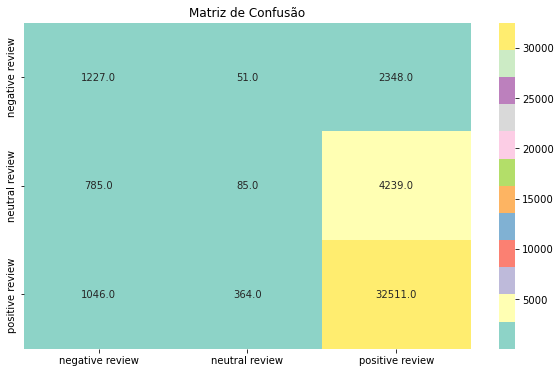

In [64]:
desempenho = confusion_matrix(df_modelo['value'],df_modelo['classification'])
matrix = pd.DataFrame(desempenho, index=['negative review', 'neutral review', 'positive review'], columns=['negative review', 'neutral review', 'positive review'])
plt.figure(figsize=(10,6))
plt.title("Matriz de Confusão")
sns.heatmap(matrix, fmt=".1f", annot=True, cmap="Set3")
plt.show()

Observando a diagonal principal, é notável a discrepância entre os acertos de reviews positivas para reviews negativas e neutras.
* Negativos: apenas 1.227 das reviews preditas eram de fato reviews negativas.
* Neutras: apenas 85 das reviews preditas eram de fato reviews neutras.
* Positivas: bom desempenho, 32.511 das reviews preditas eram de fato reviews positivas.

Devido ao fato do modelo possuir quantidades maiores de apenas um tipo de review(positivas), ocasionou em um peso maior para reviews positivas.

In [65]:
print(desempenho) #visualizando os valores sem porcentagem

[[ 1227    51  2348]
 [  785    85  4239]
 [ 1046   364 32511]]


Classification Report 

In [66]:
report = classification_report(df_modelo['value'],df_modelo['classification'])
print(report)

                 precision    recall  f1-score   support

negative review       0.40      0.34      0.37      3626
 neutral review       0.17      0.02      0.03      5109
positive review       0.83      0.96      0.89     33921

       accuracy                           0.79     42656
      macro avg       0.47      0.44      0.43     42656
   weighted avg       0.72      0.79      0.74     42656



Através do Classification Report podemos ver alguns parâmetros estatísticos. Novamente tanto a precision, recall e f1-score possuíram valores maiores para reviews positivas.

Acurácia do modelo 

In [67]:
accuracy = accuracy_score(df_modelo['value'],df_modelo['classification'])
print(f"A acurácia do modelo foi de: {accuracy}")

A acurácia do modelo foi de: 0.7929247936984246


## CountVectorizer e o Algoritmo de Naive Bayes 

O CountVectorizer é uma técnica de pré-processamento para transformar os textos em um vetor de contagens de tokens para que o algortimo (no caso, Naive Bayes) consiga processar com maior facilidade as palavras. 

<img src="img/IMG_4889.jpg" style="width:600px; heigth:700px"/>

#### Algoritmo de Naive Bayes 

O algoritmo de Naive Bayes faz a classificação probabilística de observações, partindo do principio que todas as variáveis são independentes entre si.

<img src="img/IMG_4893.jpg" style="width:600px; heigth:700px"/>

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
# escolhendo as colunas referente ao label e  ao texto
df_model = df[['Review_Text','value']]
df_model.head()

,Review_Text,value
0,ever disneyland anywhere find disneyland hong ...,positive review
1,since last time visit hk disneyland yet time s...,positive review
2,thanks god hot humid visiting park otherwise w...,positive review
3,hk disneyland great compact park unfortunately...,positive review
4,location city took around hour kowlon kids lik...,positive review


In [71]:
x = df_model['Review_Text']
target = df_model['value']

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=42)

In [72]:
count_v = CountVectorizer()

In [73]:
# trinando o modelo
count_v.fit(X_train)

CountVectorizer()

In [74]:
# aplicando o modelo
x_train = count_v.transform(X_train)

In [75]:
# tranformando x_train em um array
X_train = x_train.toarray()

In [76]:
x_test = count_v.transform(X_test) # aplicando o x_test

In [77]:
# transformando x_test em um array
X_test = x_test.toarray()

### Algoritmo de Naive Bayes

In [78]:
naivebayes = MultinomialNB()
naivebayes.fit(X_train, y_train)

MultinomialNB()

In [79]:
predict = naivebayes.predict(X_train)

In [80]:
y_predict= naivebayes.predict(X_test)

### Visualizando a Matriz de Confusão do Modelo

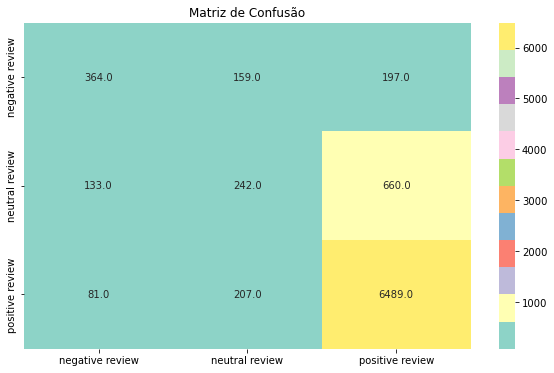

In [81]:
desempenho = confusion_matrix(y_test, y_predict)
matrix = pd.DataFrame(desempenho, index=['negative review', 'neutral review', 'positive review'], columns=['negative review', 'neutral review', 'positive review'])
plt.figure(figsize=(10,6))
plt.title("Matriz de Confusão")
sns.heatmap(matrix, fmt=".1f", annot=True, cmap="Set3")
plt.show()

In [82]:
report = classification_report(y_test, y_predict)
print(report)

                 precision    recall  f1-score   support

negative review       0.63      0.51      0.56       720
 neutral review       0.40      0.23      0.29      1035
positive review       0.88      0.96      0.92      6777

       accuracy                           0.83      8532
      macro avg       0.64      0.57      0.59      8532
   weighted avg       0.80      0.83      0.81      8532



In [83]:
accuracy = accuracy_score(y_test, y_predict)
print(f"A acurácia do modelo foi de: {accuracy}")

A acurácia do modelo foi de: 0.8315752461322081


## Suport Vector Machines (SVM)

O algoritmo de Suport Vector Machines é um algoritmo que procura um hiperplano que consiga dividir melhor o conjunto de dados.

<img src="img/IMG_4895.jpg" style="width:500px; heigth:600px"/>

In [84]:
from sklearn.svm import LinearSVC # importando o suport vector machine

In [85]:
svm = LinearSVC(class_weight = 'balanced', random_state=42)  # balanceando 

In [86]:
# treinando o modelo
svm.fit(X_train, y_train)

/Users/mariahelenasiqueiradossantos/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', random_state=42)

In [87]:
y_predict2 = svm.predict(X_test) # predict2

### Visualizando a Matriz de Confusão

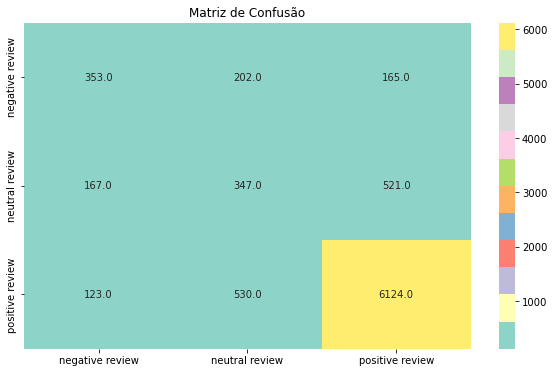

In [88]:
desempenho = confusion_matrix(y_test, y_predict2)
matrix = pd.DataFrame(desempenho, index=['negative review', 'neutral review', 'positive review'], columns=['negative review', 'neutral review', 'positive review'])
plt.figure(figsize=(10,6))
plt.title("Matriz de Confusão")
sns.heatmap(matrix, fmt=".1f", annot=True, cmap="Set3")
plt.show()

### Classification Report 

In [89]:
report = classification_report(y_test, y_predict2)
print(report)

                 precision    recall  f1-score   support

negative review       0.55      0.49      0.52       720
 neutral review       0.32      0.34      0.33      1035
positive review       0.90      0.90      0.90      6777

       accuracy                           0.80      8532
      macro avg       0.59      0.58      0.58      8532
   weighted avg       0.80      0.80      0.80      8532



In [90]:
accuracy = accuracy_score(y_test, y_predict2)
print(f"A acurácia do modelo foi de: {accuracy}")

A acurácia do modelo foi de: 0.7998124706985467


Ao analisar a matriz de confusão e classification report dos modelos (Vader e Naive Bayes e SVM), vemos uma melhoria em relação aos resultados. Sobre as acurácia, é possível enxergar um aumento nos modelos de Naive Bayes e SVM.

Acurácia:
* VADER - 79%
* SVM - 80%
* NAIVE BAYES - 83%

Além disso, pode-se notar que os modelos de Naive Bayes e de SVM conseguiram aumentar a precision, recall e f1-score das reviews neutras e negativas, já que no VADER teriam sido muito baixas e até mesmo, ineficientes. Porém é notório que em todos os modelos, as reviews positivas obtiveram um desempenho maior.